## Graph Matching

In this notebook we show how to use qFGW to perform graph matching on TOSCA meshes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
import networkx as nx
import ot 
import time
import os
from quantizedGW import * 

### Centaur meshes

In [3]:
with open('data/centaurs.pkl','rb') as handle:
    centaurs = pickle.load(handle)

In [4]:
# Parameters
k = 100  #number of partition representatives
dims = 64 #number of bins to use for Weisfeiler-Lehman (WL) histogram
wl_steps = 1 #number of WL steps
distribution_exponent = 1 # probability vector based on degree

In [5]:
len(centaurs[0])

15768

In [6]:
dataset = partition_featurize_graphlist_fpdwl(centaurs,k=k,dims=dims,wl_steps=wl_steps,
                                    distribution_offset=0,distribution_exponent=distribution_exponent,verbose=True)

Partitioning with 100 blocks in each partition
Starting with Graph 0
Partition+Featurize completed in 7.458827972412109 seconds
Distance primitives computed in 121.63416600227356 seconds
Starting with Graph 1
Partition+Featurize completed in 10.056394100189209 seconds
Distance primitives computed in 107.38030409812927 seconds


In [22]:
%%time
coup = compress_fgw_from_dicts(dataset[0],dataset[1],alpha=0.5,beta=0.5,verbose = False, return_dense = False)

Time for Matching: 0.4366021156311035 seconds
CPU times: user 951 ms, sys: 126 ms, total: 1.08 s
Wall time: 437 ms


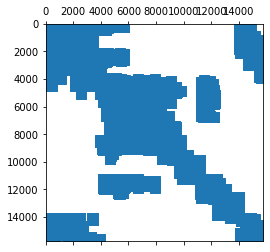

In [23]:
plt.spy(coup)